# Pfizer -  Heart Disease Case Study
# Lenin Kamma - 10/27/2023

################################################################################
### The following study is divided into 5 Major steps
#### Step-1) Data Import and preprocessing
#### Step-2) Exploratory Data Analysis, Data Visualization and Feature Engineering
#### Step-3) Model Selection and Implementation 
#### Step-4) Model Evaluation and Performance Measurement
#### Step-5) Conclusions
################################################################################

#### Step-1: Data Import and Preprocessing
In the first step all the required packages for the model development are imported and data is downloaded from excel file into a dataframe. The data dictionary is also downloaded for reference

Preliminary data investigation activities such as data quality check, identification of null or missing data, inaccurate data check and renaming of features are done in this step

In [1317]:
# import packages
import pandas as pd
import math
import numpy as np
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVR
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, consensus_score
from sklearn.metrics import roc_curve, auc
from tabulate import tabulate

In [1123]:
# import heart disease data into a dataframe
df = pd.read_excel(r'C:/users/lenin kamma/Pfizer/data/external/BAI Data Science Case Study_Heart.xlsx', sheet_name='Heart_Disease_Patient_Data', header=0)

In [1125]:
# Import data dictionary into a dataframe
df_data = pd.read_excel(r'C:/users/lenin kamma/Pfizer/data/external/BAI Data Science Case Study_Heart.xlsx', sheet_name='Heart_Disease_Patient_Data_Dict', header=0)

In [1126]:
# dataframe shape # rows and columns
df.shape

(303, 14)

In [1127]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1128]:
# data dictionary information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     14 non-null     object
 1   Description  14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [1129]:
# rename column names for easy identification
def rename_cols(dataframe, column_names):
    dataframe = dataframe.rename(columns=column_names)
    return dataframe

In [1130]:
# Dictionary of renamed columns
column_names = {'age':'age', 'sex':'sex','cp':'chest_pain','trestbps':'resting_bp','chol':'cholesterol','fbs':'fast_blood_sugar','restecg':'rest_ecg'
                ,'thalach':'max_heart_rte','exang':'exer_ind_ang', 'oldpeak':'depress_induced_exer','slope':'slope_of_peak','ca':'vessels_colored'
                , 'thal':'thalassemia','target':'target'}

In [1131]:
# Rename columns
df=rename_cols(df,column_names)

In [1132]:
# Updated columns
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rte,exer_ind_ang,depress_induced_exer,slope_of_peak,vessels_colored,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1133]:
# Check for missing values in the dataset
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
resting_bp              0
cholesterol             0
fast_blood_sugar        0
rest_ecg                0
max_heart_rte           0
exer_ind_ang            0
depress_induced_exer    0
slope_of_peak           0
vessels_colored         0
thalassemia             0
target                  0
dtype: int64

In [1134]:
# Check for duplicate rows
df[df.duplicated()=='True']

,age,sex,chest_pain,resting_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rte,exer_ind_ang,depress_induced_exer,slope_of_peak,vessels_colored,thalassemia,target


In [1135]:
# function to identify unique values for each column in a dataset
'''
    input: dataframe and columns
    output: a dictionary with column name and unique values
'''
def unique_values(dataframe, columns):
    unique_values_dict = {}
    for column in columns:
        unique_values_dict[column] = dataframe[column].unique().tolist()
    return unique_values_dict


In [1136]:
# Find unique values for each column
columns = ['slope_of_peak','vessels_colored','thalassemia','exer_ind_ang','fast_blood_sugar','sex','target', 'chest_pain']
unique_values(df,columns)

{'slope_of_peak': [0, 2, 1],
 'vessels_colored': [0, 2, 1, 3, 4],
 'thalassemia': [1, 2, 3, 0],
 'exer_ind_ang': [0, 1],
 'fast_blood_sugar': [1, 0],
 'sex': [1, 0],
 'target': [1, 0],
 'chest_pain': [3, 2, 1, 0]}

In [1137]:
# Number of rows where thalassemia value is 0
df[df['thalassemia']==0]

,age,sex,chest_pain,resting_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rte,exer_ind_ang,depress_induced_exer,slope_of_peak,vessels_colored,thalassemia,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [676]:
# Number of rows where major vessels covered by flouroscopy=4
df[df['vessels_colored']==4]

,age,sex,chest_pain,resting_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rte,exer_ind_ang,depress_induced_exer,slope_of_peak,vessels_colored,thalassemia,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


################################################################################

In the sample dataset, no missing values were identified.

There are five instances where the major vessels colored by fluoroscopy (ca) have a value of 4, whereas the acceptable range is 0-3.

Additionally, two instances have a Thalassemia value of zero, although the valid range is 1-3.

Moreover, the "chest pain type" variable contains unique values ranging from 0 to 3, but the data dictionary lacks descriptions for these numerical codes.

Slope_of_peek and depression induced by exercise do not have much description about what each value indicates
  learned about it at (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/#:~:text=Normal%20trace%20during%20exercise,exercise%20therefore%20slopes%20sharply%20upwards.https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/#:~:text=Normal%20trace%20during%20exercise,exercise%20therefore%20slopes%20sharply%20upwards.)

The dataset comprises four binary input variables, one of which is the target value.
################################################################################

#### Step-2: Exploratory Data Analysis, Data Visualization and Feature Engineering
This step involves examining and understanding the characteristics and patterns within a dataset before applying any formal modeling techniques. Generating descriptive statistics and understanding the central tendency and dispersion of the data. 

Visualizations like histograms, scatter plots, and heatmaps are used to visualize the distribution, relationships, and patterns in the data. This aids in identifying outliers and understanding the structure of the data. EDA explores the relationships between different variables. Correlation analysis helps identify which variables are strongly or weakly correlated with each other.


#### Step-2A: Data Visualization

In [1411]:
# Describe the numerical columns of the dataset to get mean and count etc..
columns_sel = df[['age','resting_bp','fast_blood_sugar','max_heart_rte','depress_induced_exer']]
columns_sel.describe()

,age,resting_bp,fast_blood_sugar,max_heart_rte,depress_induced_exer
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,0.148515,149.646865,1.039604
std,9.082101,17.538143,0.356198,22.905161,1.161075
min,29.000000,94.000000,0.000000,71.000000,0.000000
25%,47.500000,120.000000,0.000000,133.500000,0.000000
50%,55.000000,130.000000,0.000000,153.000000,0.800000
75%,61.000000,140.000000,0.000000,166.000000,1.600000
max,77.000000,200.000000,1.000000,202.000000,6.200000


In [1412]:
# Function to create histogram for input features
"""
    Iterate through each column and plot histogram
    Input: Dataframe
    Output: Histograms
""" 
def data_hist(dataframe):
  
    # Get a list of column names
    num_cols = len(dataframe.columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 6, 5))

    for i, column in enumerate(dataframe.columns):
        ax = axes[i]
        counts, bins, patches = ax.hist(dataframe[column], bins=30, color='blue', alpha=0.7)
        
        for count, bin_center, patch in zip(counts, bins[:-1], patches):
                height = patch.get_height()
                if count!=0:
                    ax.annotate(f'{int(count)}', xy=(bin_center, height), xytext=(0, 5), textcoords='offset points',
                            ha='center', va='bottom', fontsize=6)
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [1413]:
# Function to create scatter plot for all input features
"""
    Generate scatter plots for each numerical column in the DataFrame side by side.
    Input: Dataframe
    Output: Scatter plots
"""
def scat_plot(dataframe):
    
    # Get a list of numerical column names
    num_cols = dataframe.select_dtypes(include=['number']).columns.tolist()
    num_plots = len(num_cols)
    
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 6, 5))
    
    for i, column in enumerate(num_cols):
        axes[i].scatter(dataframe[column], dataframe.index, alpha=0.5)
        axes[i].set_title(f'Scatter plot for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Index')
    
    plt.tight_layout()
    plt.show()

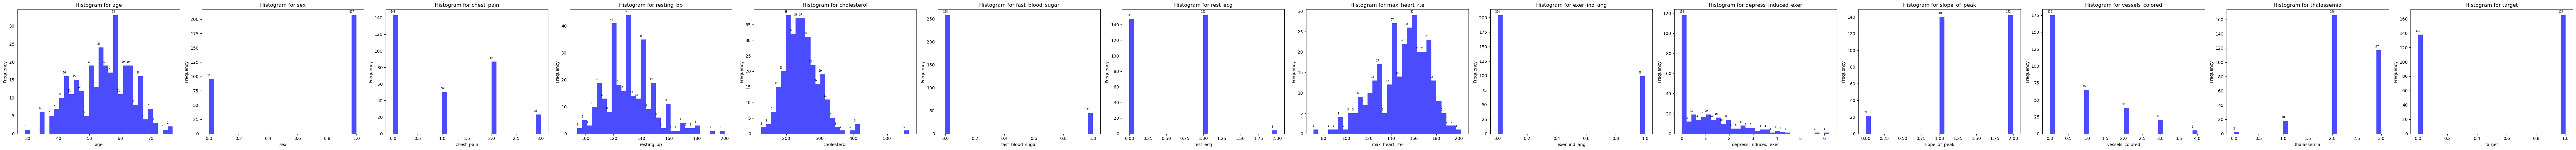

In [1414]:
# Create histograms for all columns
data_hist(df)

In [1415]:
# Create counts and percentages of Heart Disease by Sex
def groupby(dataframe):
    #grouped_data = dataframe.groupby(['sex', 'target'])['target'].count()
    
    # group by 
    grouped_data = df.groupby(['sex', 'target']).size().reset_index(name='count')

    # Calculate the percentage
    grouped_data['percentage'] = (grouped_data['count'] / grouped_data['count'].sum()) * 100

    return grouped_data

In [1416]:
groupby(df)

,sex,target,count,percentage
0,0,0,24,7.920792
1,0,1,72,23.762376
2,1,0,114,37.623762
3,1,1,93,30.693069


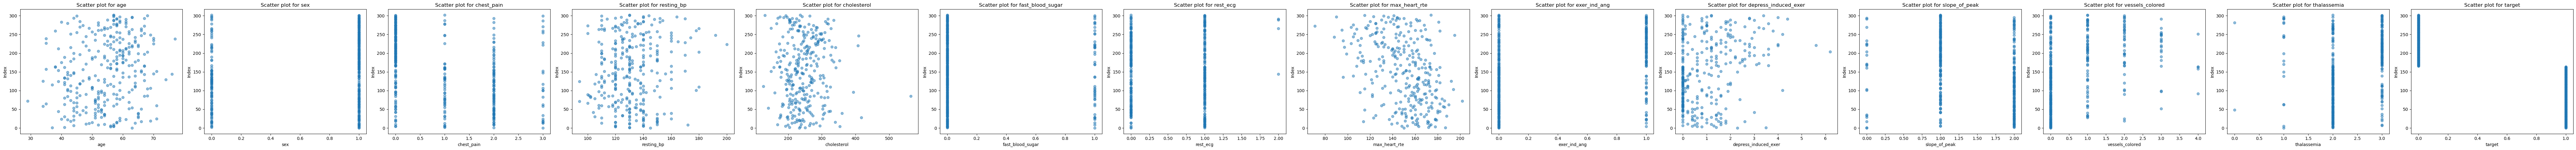

In [1417]:
# Create scatter plots for all columns
scat_plot(df)

In [1418]:
# Generate heatmap to understand the correlation between different features
"""
    Generate a heatmap between different columns of a DataFrame.
    Input:Dataframe
    Output:Heatmap
"""
def generate_heatmap(df):
   
    # Create a correlation matrix
    corr_matrix = df.corr()

    # Generate a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Set the title and show the plot
    plt.title("Correlation Heatmap")
    plt.show()

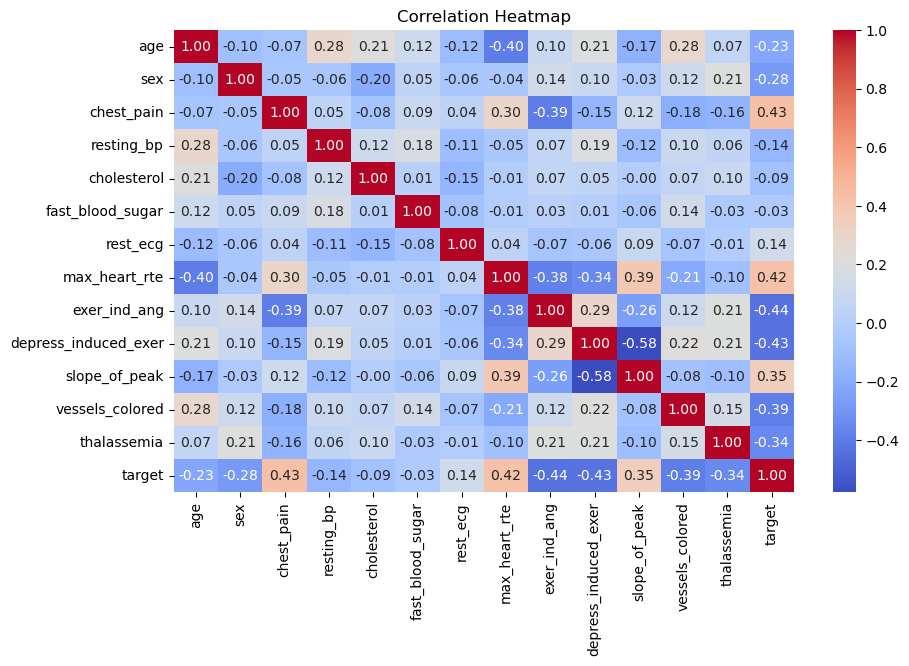

In [1419]:
generate_heatmap(df)

################################################################################

1) The dataset is imbalanced with respect to gender; 207 observations for male and only 96 observations for female

2) Cholesterol levels shows almost normalized across the population mean. There are one outliers where cholesterol level > 500 with confirmed heart disease

3) One person with age 67 is found be with less than < 80 heart rate

4) ST Depression Induced by Exercise is severly right skewed with 118 values being 0.0

6) Chest_pain and Max_Heart_Rate are highly positively correlated to Heart Disease whereas ST Depression Induced by Exercise and 
   Exercise induced agina are highly negatively correlated (Threshold = 0.3)


################################################################################

### Step-2B: Feature Engineering
In this step, feature engineering is performed to identify and select a subset of the most relevant features (variables) from the original set of feature. This is done to improve the performance of the classification model, reduce computational complexity, and avoid overfitting

Calculate the correlation between each feature and the target variable and then use the correlation coefficients to find the highly impacted features. But in this case there are two methods that are used to select the features

1) Recursive Feature Elimination (RFE): Train the classification model on the entire set of features and rank the features based on their importance scores. Remove the least important features and repeat the process until the desired number of features is reached.

2) L1 Regularization (Lasso): Apply L1 regularization to linear models (e.g., Logistic Regression).This method penalizes the absolute magnitude of coefficients, encouraging some of them to be exactly zero. The non-zero coefficients correspond to selected features.



##### Apply Standard Scaler to standardize the features

Create Input Dataset by Applying Standard Scaler

The purpose of the Standard Scaler in machine learning is to standardize or normalize the features in a dataset. 
Standardization is an essential preprocessing step in many machine learning algorithms that are sensitive to the scale of the features. 

The dataset contains Resting_BP, Cholesterol, Age, Max_Heart_Rate values that are far higher than values of other variables. So Standardization helps in achieving better model performance and can make optimization algorithms converge faster.

Since there are a very few outliers Standard Scaler can be applied to this dataset

##### Recursive Feature Elimination (RFE)

In [1420]:
# Create input dataset. Apply standard scaler.
"""
    Create input data
    Input: DataFrame, target_column
    Output: Data for RFE
"""
def prepare_dataset(df, target_column):
  
    # Import StandardScaler
    from sklearn.preprocessing import StandardScaler

    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Fit and Transform the StandardScaler instance to the dataframe
    df1=df.drop(columns=[target_column])
    
    cols = list(df1.columns)
    df1[cols] = scaler.fit_transform(df1[cols])
    df2 = pd.concat([df1,df[target_column]], axis = 1)
    
    # Create feature matrix (X) and target variable (y)
    X = df1
    y = df[target_column]
    return X, y, df2

In [1421]:
# Input dataset after applying standard Scaler and Transformation
X, y, df2 = prepare_dataset(df,'target')

In [1422]:
df2

,age,sex,chest_pain,resting_bp,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rte,exer_ind_ang,depress_induced_exer,slope_of_peak,vessels_colored,thalassemia,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


##########################################################################################

Build Recursive Feature Elimination Cross Validation (RFECV) pipeline for multiple estimators and output selected features and accuracies.

This process builds pipeline for recursive feature elimination and writes output to a dataframe

##########################################################################################

In [1423]:
# RFECV pipeline
from sklearn.tree import DecisionTreeRegressor
"""
    Input:
        estimators (dict): Dictionary of estimators with their names as keys and corresponding model instances as values.
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        step (int, optional): Step size for feature removal. Default is 1.
        cv (int, optional): Number of cross-validation folds. Default is 5.

    Output:
        result_df (pd.DataFrame): DataFrame containing selected features and accuracy levels for each estimator.
"""
def recursive_feature_elimination_pipeline(estimators, X, y, step,cv):

    results = []
    models= [DecisionTreeClassifier(), LogisticRegression()]
    
    for estimator_name, estimator in estimators.items():
        for model in models:
        
            # Build pipeline with RFE and estimator
            
            pipeline = Pipeline([
                ('feature_selection', RFECV(estimator=estimator,step=step,cv=cv,n_jobs=-1)),
                ('classifier', model)
            ])
        
            # Fit pipeline
            pipeline.fit(X, y)
            
            ''' Commented out this code which shows different features selected for each fold
            for i, (train_ix, test_ix) in enumerate(cv.split(X, y)):
                print(f"# of Folds {i}:")
                print(f"  Train: index={train_ix}")
                print(f"  Test:  index={test_ix}")
            '''
        
            # Get selected features
            selected_indices = pipeline.named_steps['feature_selection'].support_
            selected_features = list(X.columns[selected_indices])
            feature_ranking= pipeline.named_steps['feature_selection'].ranking_

            # Calculate accuracy
            y_pred = pipeline.predict(X)
            accuracy = accuracy_score(y, y_pred)
            total_features = len(selected_features)
            ranking =feature_ranking

            # Append results to list
            results.append({
                'Estimator': estimator_name,
                'Model':model,
                'Total Features Selected': total_features,
                'Selected Features': selected_features,
                'Ranking': ranking,
                'Accuracy': accuracy
            })
    
    # Create DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

In [1424]:
# Define classifiers and call RFE 
estimators = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}
target_column = 'target'
X, y, df2 = prepare_dataset(df, target_column)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=36851234)
## try with different steps parameter
result_df = recursive_feature_elimination_pipeline(estimators, X, y,step=5,cv=cv) 

In [1425]:
# Show results
pd.set_option('max_colwidth', None)
result_df

,Estimator,Model,Total Features Selected,Selected Features,Ranking,Accuracy
0,Logistic Regression,DecisionTreeClassifier(),8,"[sex, chest_pain, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]",1.000000
1,Logistic Regression,LogisticRegression(),8,"[sex, chest_pain, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]",0.851485
2,Random Forest,DecisionTreeClassifier(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.000000
3,Random Forest,LogisticRegression(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.851485
4,Decision Tree,DecisionTreeClassifier(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.000000
5,Decision Tree,LogisticRegression(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.851485
6,Gradient Boosting,DecisionTreeClassifier(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.000000
7,Gradient Boosting,LogisticRegression(),13,"[age, sex, chest_pain, resting_bp, cholesterol, fast_blood_sugar, rest_ecg, max_heart_rte, exer_ind_ang, depress_induced_exer, slope_of_peak, vessels_colored, thalassemia]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.851485


#######################################################

In the process of Recursive Feature Elimination with cross-validation, four different estimators (Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting) were employed. The resulting ranks, accuracy levels, and selected features were recorded in a dataframe.

Interestingly, both the Logistic Regression model with a Decision Tree classifier and the Decision Tree model with the same classifier achieved a remarkable accuracy of 100% using 12 features. This indicates a tie between the two approaches, suggesting that Logistic Regression or Decision Tree with a Decision Tree classifier could be considered the preferred method.

#######################################################

##### Define a function to plot confusion matrix for all models

In [1426]:
# Define a function to plot confusion matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plot a confusion matrix with labels and title specifically for logistic regression.

    Parameters:
        y_true (np.ndarray): True labels.
        y_pred (np.ndarray): Predicted labels.
        class_names (list): List of class names (order corresponding to confusion matrix).
        title (str): Title for the plot. Default is 'Confusion Matrix'.
        cmap (matplotlib.colors.Colormap): Colormap for the plot. Default is plt.cm.Blues.
    """
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = confusion_mat.max() / 2.
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#######################################################
#### Step-3: Model Selection and Implementation
##### 1) Decision Tree Classifier
We'll begin by assessing the model using a decision tree classifier. We'll perform hyperparameter tuning for the max_depth to find the model that achieves the highest area under the curve. Once the optimal max_depth is determined, it will be employed for training and testing the model. After the Decision Tree Classifier, Logistic Regression Classifier will be trained

Drop 'age', 'resting_bp','cholesterol', 'fast_blood_sugar', 'rest_ecg' features from input
##### Perform Max Depth Determination
#######################################################

In [1456]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_text

"""
    Perform Decision Tree classification using the given dataframe and provide additional evaluation metrics.

    Parameters:
        dataframe (pd.DataFrame): Input dataframe containing features and target variable.
        target_column (str): Name of the target column in the dataframe.
        max_depth (int or None): Maximum depth of the tree. Default is None.
        random_state (int): Seed for random number generation. Default is 42.

    Returns:
        dt_model (DecisionTreeClassifier): Trained Decision Tree classification model.
        X_train (pd.DataFrame): Feature matrix for training.
        X_test (pd.DataFrame): Feature matrix for testing.
        y_train (pd.Series): Target variable for training.
        y_test (pd.Series): Target variable for testing.
        tree_mapping (str): Text-based visualization of the decision tree.
        confusion_mat (pd.DataFrame): Confusion matrix.
        classification_rep (str): Classification report.
    """

def perform_decision_tree_classification(dataframe, target_column, random_state=42):
    
    
    # Separating features (X) and target variable (y)
    X = dataframe.drop([target_column, 'age', 'resting_bp','cholesterol', 'fast_blood_sugar', 'rest_ecg'], axis=1)
    y = dataframe[target_column]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    

    
    for max_depth in range(1,10):
        train_results = []
        test_results = []
        
        # Initialize and train the Decision Tree model
        dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        dt_model.fit(X_train, y_train)

        # Generate a text-based representation of the decision tree
        tree_mapping = export_text(dt_model, feature_names=list(X.columns))
        
        
        # Predicting on the test set
        y_pred = dt_model.predict(X_test)
    
    
        # Predict probabilities for ROC curve
        y_probs = dt_model.predict_proba(X)[:, 1]

        # Generate ROC curve
        fpr, tpr, _ = roc_curve(y, y_probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC-AUC curve for each max_depth
        plt.plot(fpr, tpr, lw=2, label='Max Depth = %d (area = %0.2f)' % (max_depth, roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Different Max Depths')
    plt.legend(loc='lower right')
    plt.show()
    # Calculate confusion matrix and classification report
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    return tree_mapping

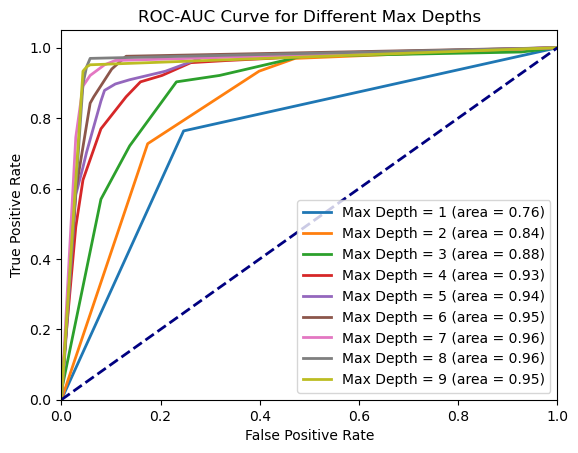

In [1457]:
tree_mapping= perform_decision_tree_classification(df2, 'target', random_state=42)

In [1458]:
print(tree_mapping)

|--- chest_pain <= -0.45
|   |--- vessels_colored <= -0.22
|   |   |--- exer_ind_ang <= 0.37
|   |   |   |--- thalassemia <= 0.31
|   |   |   |   |--- max_heart_rte <= 0.72
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- max_heart_rte >  0.72
|   |   |   |   |   |--- max_heart_rte <= 0.89
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- max_heart_rte >  0.89
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- thalassemia >  0.31
|   |   |   |   |--- depress_induced_exer <= -0.34
|   |   |   |   |   |--- max_heart_rte <= 0.61
|   |   |   |   |   |   |--- depress_induced_exer <= -0.72
|   |   |   |   |   |   |   |--- max_heart_rte <= 0.43
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- max_heart_rte >  0.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- depress_induced_exer >  -0.72
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- max_heart_rte >  0.61
|   |   |   |   |   |   |--- class: 

##################################################
##### Hyperparameter max_depth determination
Training and testing the decision tree classifier will be done using max_depth parameter values ranging from 1 to 10. For this process, 80% of the input data will be utilized for training, while the remaining 20% will be reserved for testing. To ensure reproducibility, random state is set to 42
##################################################


In [1459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def perform_decision_tree(dataframe, target_column, max_depth, random_state):
 
    # Separating features (X) and target variable (y)
    # drop 5 columns from X
    X = dataframe.drop([target_column,'age', 'resting_bp','cholesterol', 'fast_blood_sugar', 'rest_ecg'], axis=1)
    y = dataframe[target_column]
    

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and train the Decision Tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    dt_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = dt_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(max_depth, round(accuracy,4))
    
     # Calculate confusion matrix and classification report
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    return tree_mapping, confusion_mat, classification_rep

In [1460]:
# Change Max_Depth from 4 to 10 and find the accuracy levels
for max_depth in range(1,10):
    tree_mapping, confusion_mat, classification_rep= perform_decision_tree(df2, 'target', max_depth, random_state=42)

1 0.8361
2 0.7869
3 0.8197
4 0.8525
5 0.8197
6 0.8197
7 0.7869
8 0.8197
9 0.7705


##################################
##### Max-Depth = 4 has the highest accuracy
Max_depth value 4 is found to have highest accuracy based on the hyperparameter tuning. Run model for the max_depth value of 4 to find the final accuracy of Decision Tree Classifier

#################################

In [1461]:
# run Decision tree model for max_depth=4
tree_mapping, confusion_mat, classification_rep= perform_decision_tree(df2, 'target', max_depth=4, random_state=42)

4 0.8525


In [1462]:
# Print Classification Report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



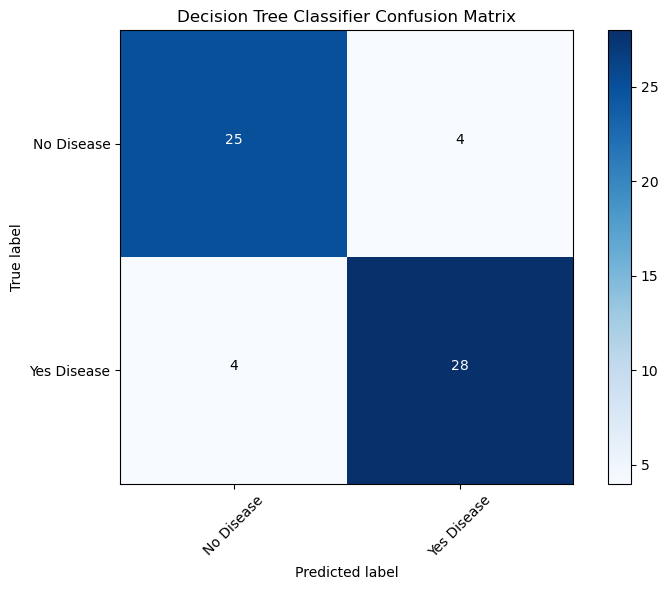

In [1463]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, class_names=['No Disease','Yes Disease'], title='Decision Tree Classifier Confusion Matrix', cmap=plt.cm.Blues)

##### 2) Logistic Regression Classifier

Perform training on Logistic Regression Classifier. Drop 'age', 'resting_bp','cholesterol', 'fast_blood_sugar', 'rest_ecg' columns before running the model


In [1478]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def log_regression(dataframe):


    # Create a StandardScaler instance
    scaler = StandardScaler()

    df_log=dataframe.drop(columns=[target_column,'age', 'resting_bp','cholesterol', 'fast_blood_sugar', 'rest_ecg'])

    cols = list(df_log.columns)
    df_log[cols] = scaler.fit_transform(df_log[cols])

    # Create feature matrix (X) and target variable (y)
    X = df_log
    y=  df['target']


    # Step 2: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Create and train the logistic regression model with L1 regularization
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # Step 4: Predict on the test set
    y_pred = model.predict(X_test)

    # Get the coefficients (weights) of the model
    coefficients = model.coef_[0]

    # Identify selected features (those with non-zero coefficients)
    selected_features = list(X.columns[coefficients != 0])
    
    # Step 3: Generate the Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Step 4: Generate the Classification Report
    classification_rep = classification_report(y_test, y_pred)


    # Step 5: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    #print(f'Accuracy: {accuracy}')

    return model, selected_features, coefficients, accuracy, confusion_mat, classification_rep

In [1479]:
# Evaluate model
model, selected_features, coefficients, accuracy, confusion_mat, classification_rep = log_regression(df2)

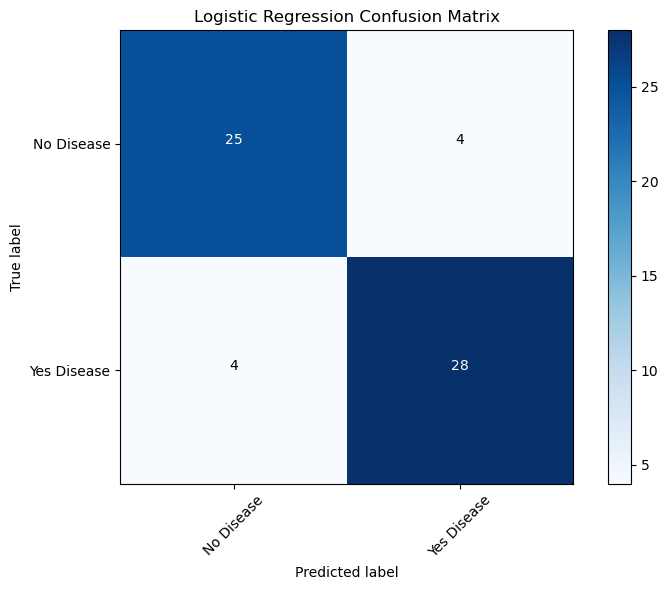

In [1480]:
plot_confusion_matrix(y_test, y_pred, class_names=['No Disease','Yes Disease'], title='Logistic Regression Confusion Matrix', cmap=plt.cm.Blues)

#### Step-4: Model Evaluation and Performance Measurement

In [1481]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [1482]:
# Define a function to write coefficients
def display_list(list1, list2):
   
    table = {'Features': list1, 'Coefficients': list2}
    df= pd.DataFrame(table)
    df = df.sort_values(by='Coefficients', ascending=False)
    print(df)
    
display_list(selected_features,abs(coefficients))

               Features  Coefficients
1            chest_pain      0.797389
6       vessels_colored      0.781247
4  depress_induced_exer      0.749359
0                   sex      0.651703
7           thalassemia      0.554705
3          exer_ind_ang      0.522403
5         slope_of_peak      0.403561
2         max_heart_rte      0.380143


##### 3)  Logistic Regression Classifier with Lasso Regularization

Lasso regularization, also known as L1 regularization, is a technique used in machine learning and statistics to add a penalty term based on the absolute value of the coefficients in a linear model. This encourages the model to select a subset of the most important features, effectively performing feature selection and reducing overfitting.

In [1472]:
## l1 regularization Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def l1_regularization(dataframe):


    # Create a StandardScaler instance
    scaler = StandardScaler()

    df_lasso=dataframe.drop(columns=[target_column])

    cols = list(df1.columns)
    df_lasso[cols] = scaler.fit_transform(df1[cols])

    # Create feature matrix (X) and target variable (y)
    X = df_lasso
    y=  df['target']


    # Step 2: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Create and train the logistic regression model with L1 regularization
    model = LogisticRegression(penalty='l1', solver='liblinear')  # Specify 'liblinear' solver for small datasets
    model.fit(X_train, y_train)

    # Step 4: Predict on the test set
    y_pred = model.predict(X_test)

    # Get the coefficients (weights) of the model
    coefficients = model.coef_[0]

    # Identify selected features (those with non-zero coefficients)
    selected_features = list(X.columns[coefficients != 0])
    
    # Step 3: Generate the Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Step 4: Generate the Classification Report
    classification_rep = classification_report(y_test, y_pred)


    # Step 5: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    #print(f'Accuracy: {accuracy}')

    return model, selected_features, coefficients, accuracy, confusion_mat, classification_rep

In [1473]:
model, selected_features, coefficients, accuracy, confusion_mat, classification_rep = l1_regularization(df2)

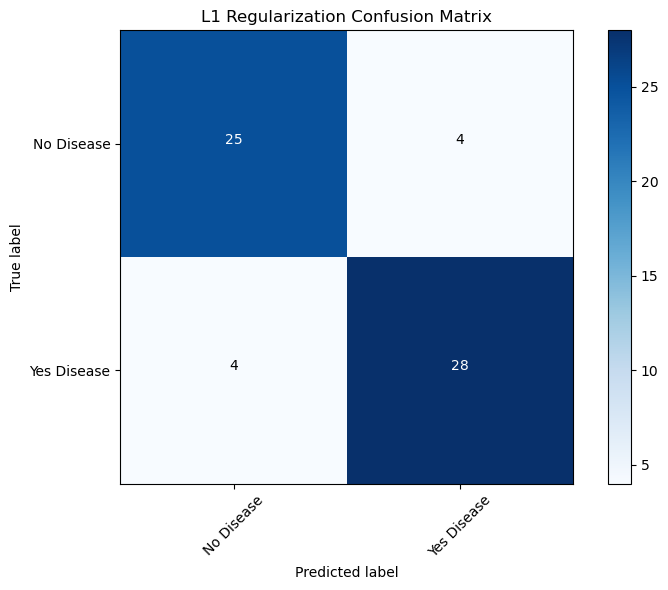

In [1474]:
plot_confusion_matrix(y_test, y_pred, class_names=['No Disease','Yes Disease'], title='L1 Regularization Confusion Matrix', cmap=plt.cm.Blues)

In [1475]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [1476]:
# Define a function to write coefficients
def display_list(list1, list2):
   
    table = {'Features': list1, 'Coefficients': list2}
    df= pd.DataFrame(table)
    df = df.sort_values(by='Coefficients', ascending=False)
    print(df)
    
display_list(selected_features,abs(coefficients))

                Features  Coefficients
2             chest_pain      0.815120
11       vessels_colored      0.781499
1                    sex      0.721611
9   depress_induced_exer      0.718694
12           thalassemia      0.563693
8           exer_ind_ang      0.506319
10         slope_of_peak      0.402931
7          max_heart_rte      0.375146
6               rest_ecg      0.253354
3             resting_bp      0.246375
4            cholesterol      0.135303
0                    age      0.065304
5       fast_blood_sugar      0.038718


##### Conclusions
1) Decision Tree Classifier
2) Logistic Regression Classifier:
3) Logistic Regression with Lasso Regularization:


a) The Decision Tree Classifier, Logistic Regression Classifier, and Logistic Regression with Lasso Regularization all exhibit a False Positive Rate (FPR) of 13.7% and a True Negative Rate (TNR) of 12.5%.

Given that all three models share the same FPR/TNR rates, the model with the highest Accuracy is considered the optimal choice. Therefore, any of the Logistic Regression Models can be selected as the final model (with accuracy of 87%). Moreover, they boast the highest Recall Rate (88%), a critical factor in medical disease recognition.

b) All These are Contributing Factors based on the Coefficients determined by logistic regression

    Chest Pain
    Sex
    Vessels_Colored
    ST Depression induced by Exercise
    Thalassemia
    Exercise Induced Angina
    Slope of Peak Exercise ST Segment
    Max Heart Rate



## End